In [ ]:
%matplotlib notebook

from random import randint
import pandas as pd
import os
import tensorflow_addons as tfa
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import math
from numpy import savetxt
from numpy import linalg as LA
import seaborn as sns
import matplotlib
from matplotlib import font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
font_dirs = ["/Times_New_Roman"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)
custom_font_manager = font_manager.FontManager()
for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
result = font_manager.fontManager.findfont('Times New Roman')
print(result)
plt.rcParams["font.family"] = "Times New Roman"
font = {'size'   : 12}
matplotlib.rc('font', **font)

# from sklearn.model_selection import train_test_split
# import tensorflow.keras.backend as K
# from tensorflow.keras.optimizers import RMSprop
# import tensorflow_addons as tfa
# from tensorflow.python.client import device_lib
import tensorflow as tf
# import time
import setproctitle as SP
# rom sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
# os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
# from tensorflow import keras
# from tensorflow.keras.layers import Activation, Conv1D, Input, Flatten, Dense, BatchNormalization, ReLU, Dropout, MaxPooling1D, GlobalAveragePooling1D
# from tensorflow.keras.losses import Huber, MeanSquaredError, huber
# from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
# from tensorflow import keras
# import tensorflow.keras.losses
# # from keras.regularizers import l2
# # from keras import backend as K
# import keras_tuner as kt
# from keras_tuner.tuners import RandomSearch,Sklearn,BayesianOptimization,Hyperband
# from tensorflow.keras import layers, models
# from keras_tuner.engine.hyperparameters import HyperParameters
# from hyperopt import hp
# from tensorflow.keras.layers import Lambda

In [2]:
# from ipynb.fs.full.utils import Tip_RMSE

In [3]:
def Tip_RMSE(y_test_GT,y_test_pred_F):
    [n_ts,m_ts]=y_test_GT.shape

    TipError=np.zeros((n_ts))
    RMSE=np.zeros((n_ts))
    EuclideanDistance=np.zeros((n_ts,20))

    for i in range (0,n_ts):
        M1=y_test_GT[i,0:3];
        M2=y_test_GT[i,3:6];
        M3=y_test_GT[i,6:9];
        M4=y_test_GT[i,9:12];
        M5=y_test_GT[i,12:15];
        M6=y_test_GT[i,15:18];
        M7=y_test_GT[i,18:21];
        M8=y_test_GT[i,21:24];
        M9=y_test_GT[i,24:27];
        M10=y_test_GT[i,27:30];
        M11=y_test_GT[i,30:33];
        M12=y_test_GT[i,33:36];
        M13=y_test_GT[i,36:39];
        M14=y_test_GT[i,39:42];
        M15=y_test_GT[i,42:45];
        M16=y_test_GT[i,45:48];
        M17=y_test_GT[i,48:51];
        M18=y_test_GT[i,51:54];
        M19=y_test_GT[i,54:57];
        M20=y_test_GT[i,57:60];
#         M21=y_test_GT[i,60:63];
    # 
        MP1=y_test_pred_F[i,0:3];
        MP2=y_test_pred_F[i,3:6];
        MP3=y_test_pred_F[i,6:9];
        MP4=y_test_pred_F[i,9:12];
        MP5=y_test_pred_F[i,12:15];
        MP6=y_test_pred_F[i,15:18];
        MP7=y_test_pred_F[i,18:21];
        MP8=y_test_pred_F[i,21:24];
        MP9=y_test_pred_F[i,24:27];
        MP10=y_test_pred_F[i,27:30];
        MP11=y_test_pred_F[i,30:33];
        MP12=y_test_pred_F[i,33:36];
        MP13=y_test_pred_F[i,36:39];
        MP14=y_test_pred_F[i,39:42];
        MP15=y_test_pred_F[i,42:45];
        MP16=y_test_pred_F[i,45:48];
        MP17=y_test_pred_F[i,48:51];
        MP18=y_test_pred_F[i,51:54];
        MP19=y_test_pred_F[i,54:57];
        MP20=y_test_pred_F[i,57:60];
#         MP21=y_test_pred_F[i,60:63];

    #     
        EuclideanDistance[i,:]=[LA.norm(MP1-M1),LA.norm(MP2-M2),LA.norm(MP3-M3),LA.norm(MP4-M4),LA.norm(MP5-M5),LA.norm(MP6-M6)
                                  ,LA.norm(MP7-M7),LA.norm(MP8-M8),LA.norm(MP9-M9),LA.norm(MP10-M10),LA.norm(MP11-M11)
                                  ,LA.norm(MP12-M12),LA.norm(MP13-M13),LA.norm(MP14-M14),LA.norm(MP15-M15),LA.norm(MP16-M16)
                                  ,LA.norm(MP17-M17),LA.norm(MP18-M18),LA.norm(MP19-M19),LA.norm(MP20-M20)];
    
        TipError[i]=LA.norm(MP20-M20)
        RMSE[i]=tf.sqrt(tf.math.reduce_mean(tf.square(EuclideanDistance[i,:])))
    inq_TE=np.quantile(TipError,[0.25, 0.75])
    upper_bound_TE = inq_TE[1]+(1.5*(inq_TE[1]-inq_TE[0]))
    lower_bound_TE = inq_TE[0]-(1.5*(inq_TE[1]-inq_TE[0]))
    Outliers_TE=TipError[(TipError <= lower_bound_TE) | (TipError >= upper_bound_TE)]
    
    inq_RMSE=np.quantile(RMSE,[0.25, 0.75])
    upper_bound_RMSE = inq_RMSE[1]+(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    lower_bound_RMSE = inq_RMSE[0]-(1.5*(inq_RMSE[1]-inq_RMSE[0]))
    Outliers_RMSE=RMSE[(RMSE <= lower_bound_RMSE) | (RMSE >= upper_bound_RMSE)]
    

    print([np.mean(TipError),np.median(TipError),inq_TE[1]-inq_TE[0],len(Outliers_TE)],'Tip Error')
    print([np.mean(RMSE),np.median(RMSE),inq_RMSE[1]-inq_RMSE[0],len(Outliers_RMSE)],'RMSE')
    
        
#     print([tf.math.reduce_mean(TipError),tf.math.reduce_mean(RMSE)])
    green_diamond = dict(marker='D',markeredgecolor='0.7', markersize=3)#markerfacecolor=None, , alpha=0.6
    medianprops = dict(linewidth=1.5)
    
#     plt.figure(figsize=(3,4))
#     plt.boxplot([TipError,RMSE],labels=['Tip Error','RMSE'],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylabel('Error [mm]')
#     plt.grid(b=True, which='both', axis='both', color='0.95')
#     plt.ylim(top=100,bottom=-1)
#     plt.tight_layout()
# #     plt.savefig('TipRMSE.svg',format='svg')

    plt.figure(figsize=(8,4))
    plt.boxplot(EuclideanDistance[:,:],flierprops=green_diamond,medianprops=medianprops)
#     plt.ylim(top=100,bottom=-1)
    plt.ylabel('Error [mm]')
    plt.xlabel('Marker')
    plt.grid(b=True, which='both', axis='both', color='0.95')
    plt.tight_layout()
#     plt.savefig('EUC.svg',format='svg')
 
def skip_diag_masking(A):
    return A[~np.eye(A.shape[0],dtype=bool)].reshape(A.shape[0],-1)

def skip_diag_broadcasting(A):
    m = A.shape[0]
    idx = (np.arange(1,m+1) + (m+1)*np.arange(m-1)[:,None]).reshape(m,-1)
    return A.ravel()[idx]

def skip_diag_strided(A):
    m = A.shape[0]
    strided = np.lib.stride_tricks.as_strided
    s0,s1 = A.strides
    return strided(A.ravel()[1:], shape=(m-1,m), strides=(s0+s1,s1)).reshape(m,-1)


def Rel2Abs(pred_Relative):
    pred_Absolute = np.zeros((len(pred_Relative),60)) 
    for i in range(0,len(pred_Relative)):
        pred_Absolute[i,0:3]=pred_Relative[i,0:3]
        for j in range(1,20):
                pred_Absolute[i,3*j]=pred_Absolute[i,3*j-3]+pred_Relative[i,3*j]
                pred_Absolute[i,3*j+1]=pred_Absolute[i,3*j-2]+pred_Relative[i,3*j+1]
                pred_Absolute[i,3*j+2]=pred_Absolute[i,3*j-1]+pred_Relative[i,3*j+2]
    return pred_Absolute
                
def euclidean_distance(vects):
    """Find the Euclidean distance between two vectors.

    Arguments:
        vects: List containing two tensors of same length.

    Returns:
        Tensor containing euclidean distance
        (as floating point value) between vectors.
    """

    x, y = vects
    sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
    return tf.math.sqrt(tf.math.maximum(sum_square, tf.keras.backend.epsilon()))      

# Functions from @Mateen Ulhaq and @karlo
def set_axes_equal(ax: plt.Axes):
    """Set 3D plot axes to equal scale.

    Make axes of 3D plot have equal scale so that spheres appear as
    spheres and cubes as cubes.  Required since `ax.axis('equal')`
    and `ax.set_aspect('equal')` don't work on 3D.
    """
    limits = np.array([
        ax.get_xlim3d(),
        ax.get_ylim3d(),
        ax.get_zlim3d(),
    ])
    origin = np.mean(limits, axis=1)
    radius = 0.5 * np.max(np.abs(limits[:, 1] - limits[:, 0]))
    _set_axes_radius(ax, origin, radius)

def _set_axes_radius(ax, origin, radius):
    x, y, z = origin
    ax.set_xlim3d([x - radius, x + radius])
    ax.set_ylim3d([y - radius, y + radius])
    ax.set_zlim3d([z - radius, z + radius])

from numba import jit, cuda
# from numba import vectorize

# @cuda.jit('float32(float32, float32)', device=True)
def RMSE_calculations(Y_test,Y_train):
    n=Y_test.shape[0]
    m=Y_train.shape[0]

    RMSE=np.zeros((n,m))

    for j in range(n):
#         print(j)
        for i in range(0,m):
            RMSE[j,i]=np.sqrt(np.mean(np.square(Y_test[j,:]-Y_train[i,:])))
#     print(RMSE.shape)
#     RMSE=skip_diag_strided(RMSE)
    return RMSE 



def make_pairs(X,RMSE,limits):
#     pairs=[]
    labels=[]
    index_list=[]
    for anc in range(X.shape[0]):
        for p in range(anc+1,RMSE.shape[1]):
            
            if RMSE[anc,p]<limits[0]:#similar
#                 pairs.append([X[anc,:,:],X[p,:,:]])
                labels.append([0])
                index_list.append([anc,p])
                
            if RMSE[anc,p]>limits[1] and RMSE[anc,p]<limits[2]:#not similar
#                 pairs.append([X[anc,:,:],X[p,:,:]])
                labels.append([1])
                index_list.append([anc,p])
                
    return np.array(labels), np.array(index_list)#np.array(pairs), 

def Self_RMSE_calculations(Y):
    n=Y.shape[0]
    RMSE=np.zeros((n,n))

    for j in range(n): 
        for i in range(j+1,n):
            RMSE[j,i]=np.sqrt(np.mean(np.square(Y[j,:]-Y[i,:])))
#     print(RMSE.shape)
#     RMSE=skip_diag_strided(RMSE)
    return RMSE

def Distance(n_tr,X):
    Y = np.zeros((n_tr,20))
    for i in range(0,n_tr):
        for j in range(0,20):
            Y[i,j]=math.sqrt(np.square(X[i,3*j])+np.square(X[i,3*j+1])+np.square(X[i,3*j+2])) 
    return Y

In [11]:

@jit#('float32(float32, float32)', device=True)
def find_pairs(RMSE,limit,n,m):
    index_list=[]
    for anc in range(0,n):#(RMSE.shape[0]):
        for p in range(0,m):#(0,RMSE.shape[1]):

            if RMSE[anc,p]<limit:#similar
                index_list.append([anc,p])
                
                
    return np.array(index_list)

In [18]:
@jit#('float32(float32, float32)', device=True)
def find_counts(Count,limit,n):
    index_list=[]
    for anc in range(0,n):#(RMSE.shape[0]):
#         for p in range(0,m):#(0,RMSE.shape[1]):
            
        if Count[anc]>limit:#similar
            index_list.append([anc])
                
    return np.array(index_list)


In [4]:
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpu_options = tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.1)

sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))



<IPython.core.display.Javascript object>


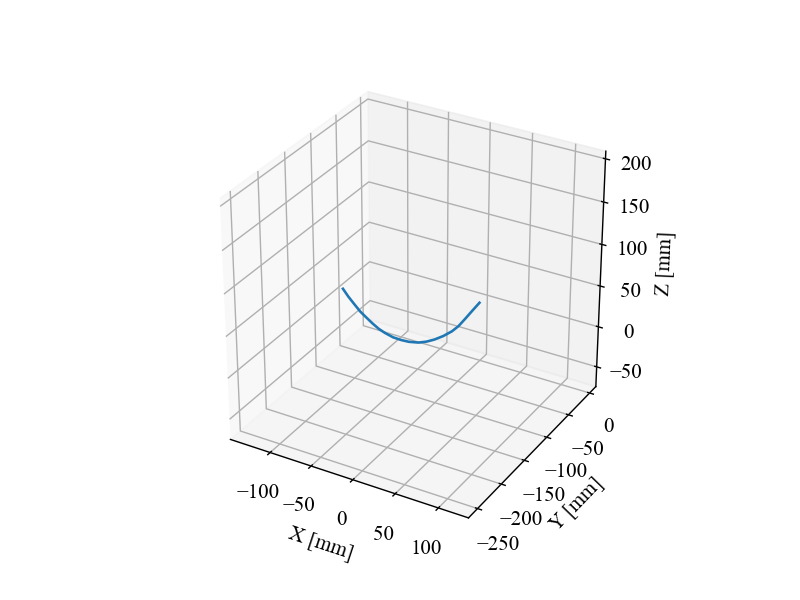

<IPython.core.display.Javascript object>


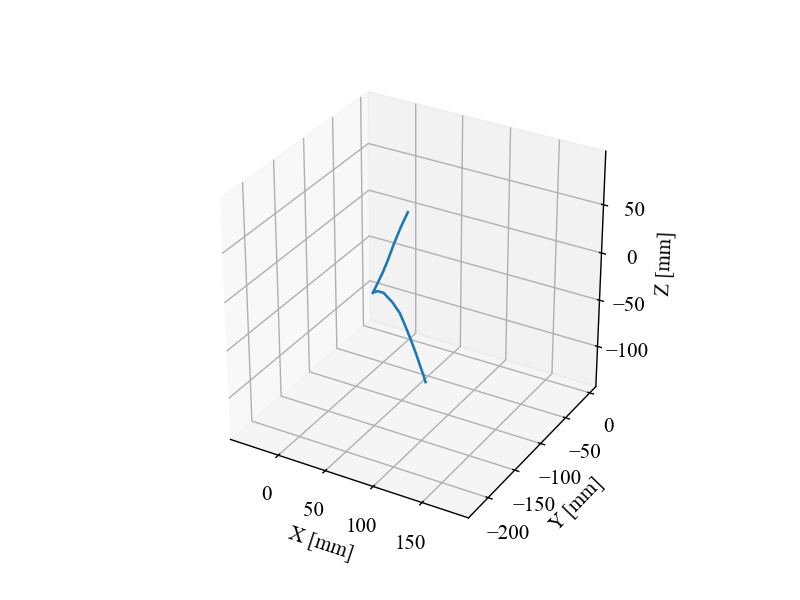

<IPython.core.display.Javascript object>


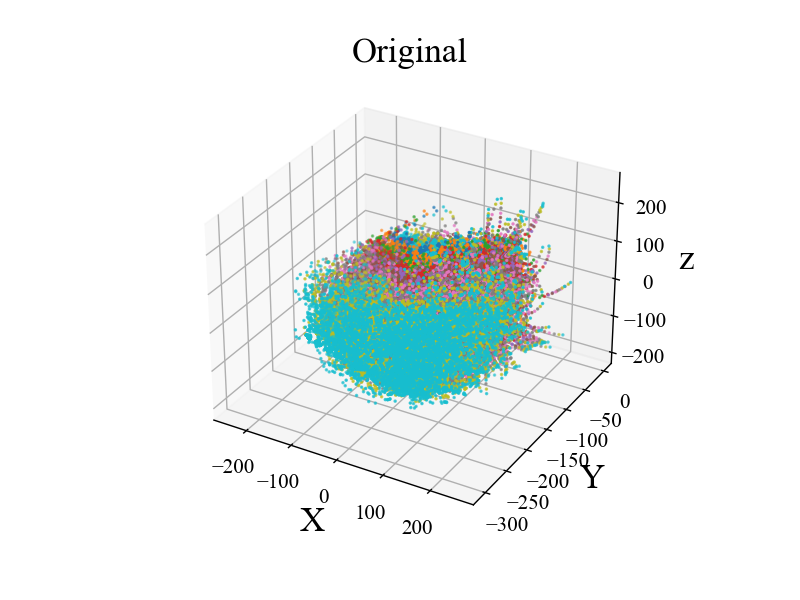

In [8]:

os.chdir("/data/processed_data")
# os.getcwd()
ScanTime='NoPreProcessing_1606Random_10-05-2022--15-12'

y_train_rand = genfromtxt('y_train_'+ScanTime+'.csv', delimiter=';')

y_test_rand = genfromtxt('y_test_'+ScanTime+'.csv', delimiter=';')

j=1
xyz_1 = y_test_rand


xyz=y_train_rand[j].reshape((20,3))

fig = plt.figure()
ax= fig.gca(projection='3d')
plt.ion()
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
fig.show() 

xyz=xyz_1[j].reshape((20,3))

fig = plt.figure()
ax= fig.gca(projection='3d')
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
plt.ion()
fig.show() 


fig = plt.figure()
# colors = np.random.rand(n_tr)
# i=0
for i in range(0,20):
    ax= fig.gca(projection='3d')
    ax.scatter(xyz_1[:,3*i],xyz_1[:,3*i+1],xyz_1[:,3*i+2] ,s = 1)#,c = colors
    ax.set_title('Original', fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('z', fontsize=20)

In [12]:
os.chdir("/data/ShapeDiversity")
RMSE_matrix_Random=RMSE_calculations(y_test_rand,y_train_rand)
np.save('RMSE_matrix_1606Random.npy', RMSE_matrix_Random)
# RMSE_matrix_Random = np.load('RMSE_matrix_1606Random.npy')

<IPython.core.display.Javascript object>


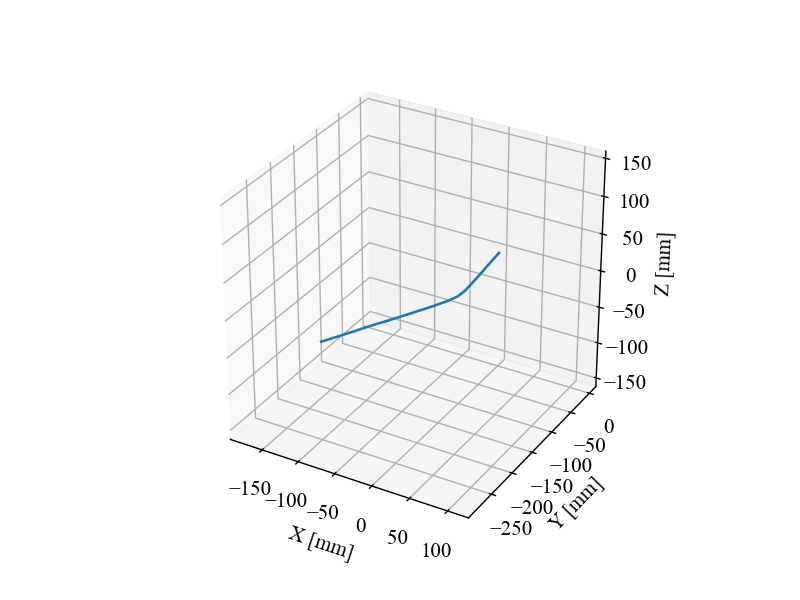

<IPython.core.display.Javascript object>


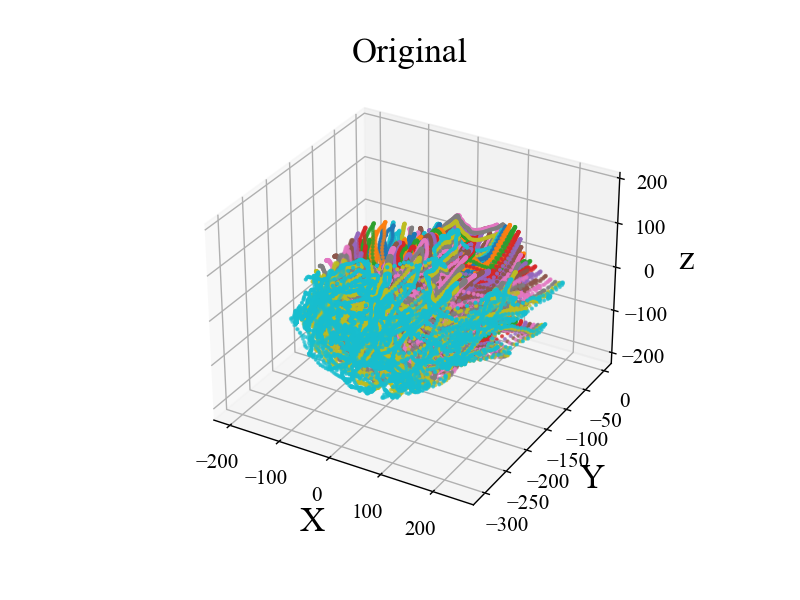

In [9]:

os.chdir("/data/processed_data")
# os.getcwd()


y_3min_first_raw = genfromtxt('y_3min_NoPreProcessing_10-05-2022--15-50.csv', delimiter=';')

j=740
xyz_1=y_3min_first_raw
xyz=xyz_1[j].reshape((20,3))


fig = plt.figure()
ax= fig.gca(projection='3d')
plt.ion()
ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
fig.show() 



fig = plt.figure()
# colors = np.random.rand(n_tr)
for i in range(0,20):
    ax= fig.gca(projection='3d')
    ax.scatter(xyz_1[:,3*i],xyz_1[:,3*i+1],xyz_1[:,3*i+2] ,s = 2)#,c = colors
    ax.set_title('Original', fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('z', fontsize=20)

<IPython.core.display.Javascript object>


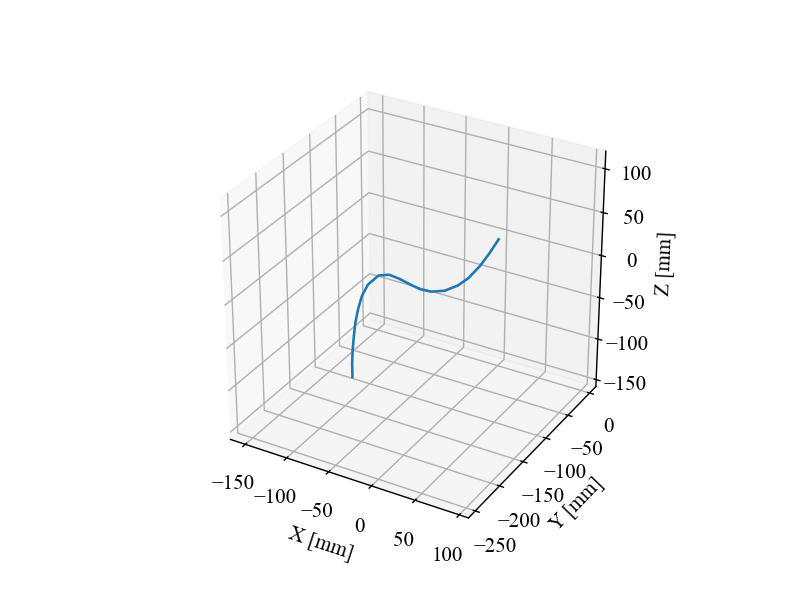

<IPython.core.display.Javascript object>


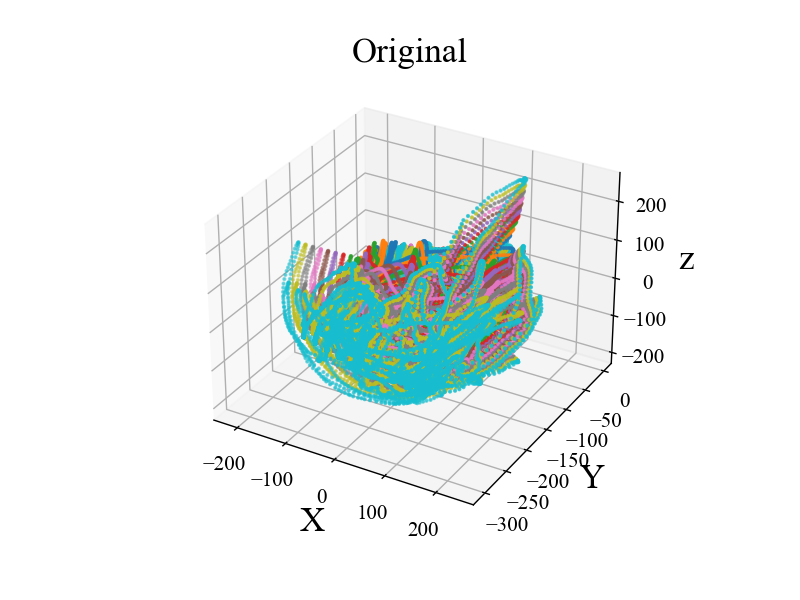

In [10]:

os.chdir("/data/processed_data")
# os.getcwd()

y_3min_second_raw = genfromtxt('y_3min_NoPreProcessing_10-05-2022--15-56_second.csv', delimiter=';')

j=3000
xyz_1=y_3min_second_raw
xyz=xyz_1[j].reshape((20,3))


fig = plt.figure()
ax= fig.gca(projection='3d')
plt.ion()

ax.plot(xyz[:,0], xyz[:,1], xyz[:,2])
ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.set_xlabel('X [mm]')#, rotation=150, fontsize=12
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
fig.show() 

fig = plt.figure()
# colors = np.random.rand(n_tr)
# i=0
for i in range(0,20):
    ax= fig.gca(projection='3d')
    ax.scatter(xyz_1[:,3*i],xyz_1[:,3*i+1],xyz_1[:,3*i+2] ,s = 2)#,c = colors
    ax.set_title('Original', fontsize=20)
    ax.set_xlabel('X', fontsize=20)
    ax.set_ylabel('Y', fontsize=20)
    ax.set_zlabel('z', fontsize=20)

In [13]:
y_3min_TempExcl=np.concatenate((y_3min_first_raw[2200:5400,:],y_3min_second_raw[2700:5306,:]), axis=0)
y_3min_TempExcl.shape

(5806, 60)

In [14]:

os.chdir("/data/ShapeDiversity")
#excluding template measurements and the samples when the sensor was not moving 

y_3min_TempExcl=np.concatenate((y_3min_first_raw[2200:5400,:],y_3min_second_raw[2700:5306,:]), axis=0)
RMSE_matrix_3min_TempExcl=RMSE_calculations(y_3min_TempExcl,y_train_rand)
np.save('RMSE_matrix_3min_TempExcl.npy', RMSE_matrix_3min_TempExcl)
# RMSE_matrix_Random = np.load('RMSE_matrix_3min_TempExcl.npy')

In [15]:
limit = 5#np.quantile(np.array(RMSE_matrix_Random[1,:]),[0.01])
n=RMSE_matrix_Random.shape[0]
m=RMSE_matrix_Random.shape[1]
Indexes_Random=find_pairs(RMSE_matrix_Random,limit,n,m)

In [16]:
# limit = np.quantile(np.array(RMSE_matrix_30min3min3min[1,:]),[0.01])
n=RMSE_matrix_3min_TempExcl.shape[0]
m=RMSE_matrix_3min_TempExcl.shape[1]
Indexes_3min_TempExcl=find_pairs(RMSE_matrix_3min_TempExcl,limit,n,m)

In [19]:
Count_th=100
unique, counts = np.unique(Indexes_Random[:,0], return_counts=True)
# print(unique.shape)
# print(counts)
# print(dict(zip(unique, counts)))
NumberOfPairs=find_counts(counts,Count_th,counts.shape[0])
print(NumberOfPairs.shape[0])

# print(NumberOfPairs)

1071


In [20]:
unique, counts = np.unique(Indexes_3min_TempExcl[:,0], return_counts=True)
# print(unique.shape)
# print(counts.shape)
# print(dict(zip(unique, counts)))
NumberOfPairs=find_counts(counts,Count_th,counts.shape[0])
print(NumberOfPairs.shape[0])

100


<IPython.core.display.Javascript object>


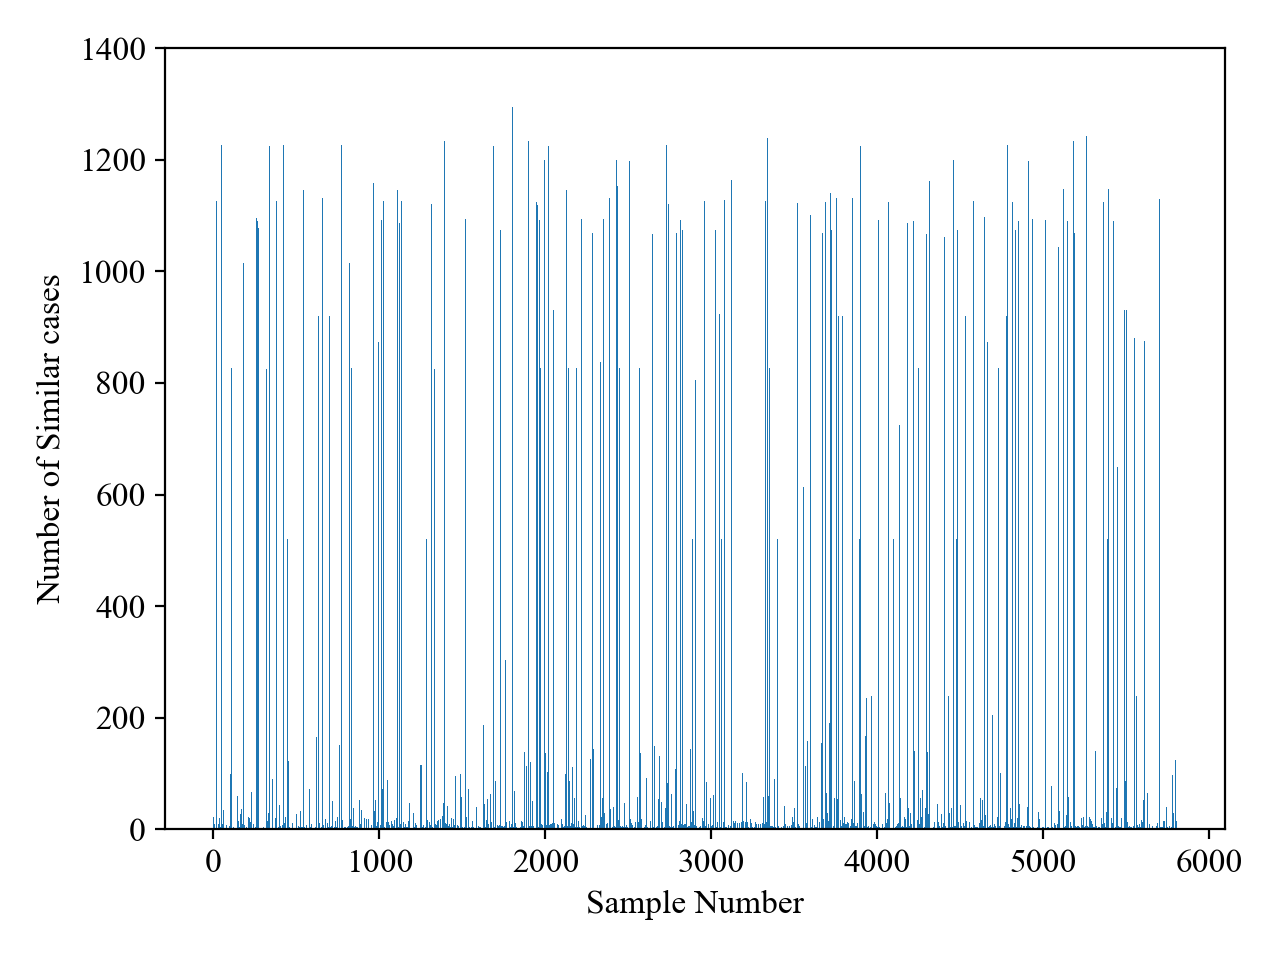

In [21]:
plt.figure()
plt.hist(Indexes_Random[:,0],bins=5800)
plt.xlabel('Sample Number')
plt.ylabel('Number of Similar cases')
plt.ylim(top=1400)
plt.tight_layout()

<IPython.core.display.Javascript object>


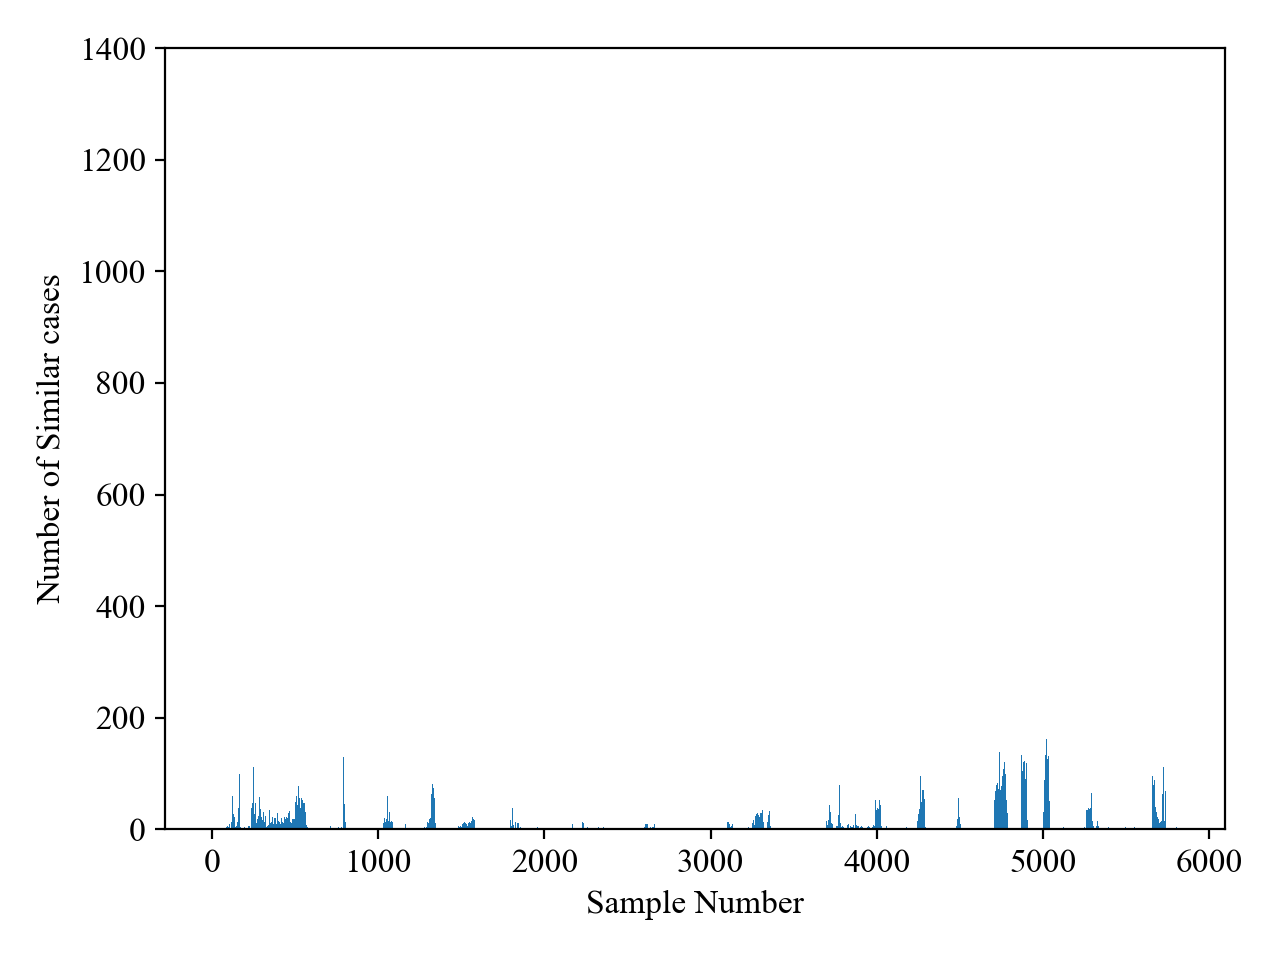

In [22]:
plt.figure()
plt.hist(Indexes_3min_TempExcl[:,0],bins=5800)
plt.xlabel('Sample Number')
plt.ylabel('Number of Similar cases')
plt.ylim(top=1400)
plt.tight_layout()

[2.0373653883952403, 1.7991863183615169]


<IPython.core.display.Javascript object>


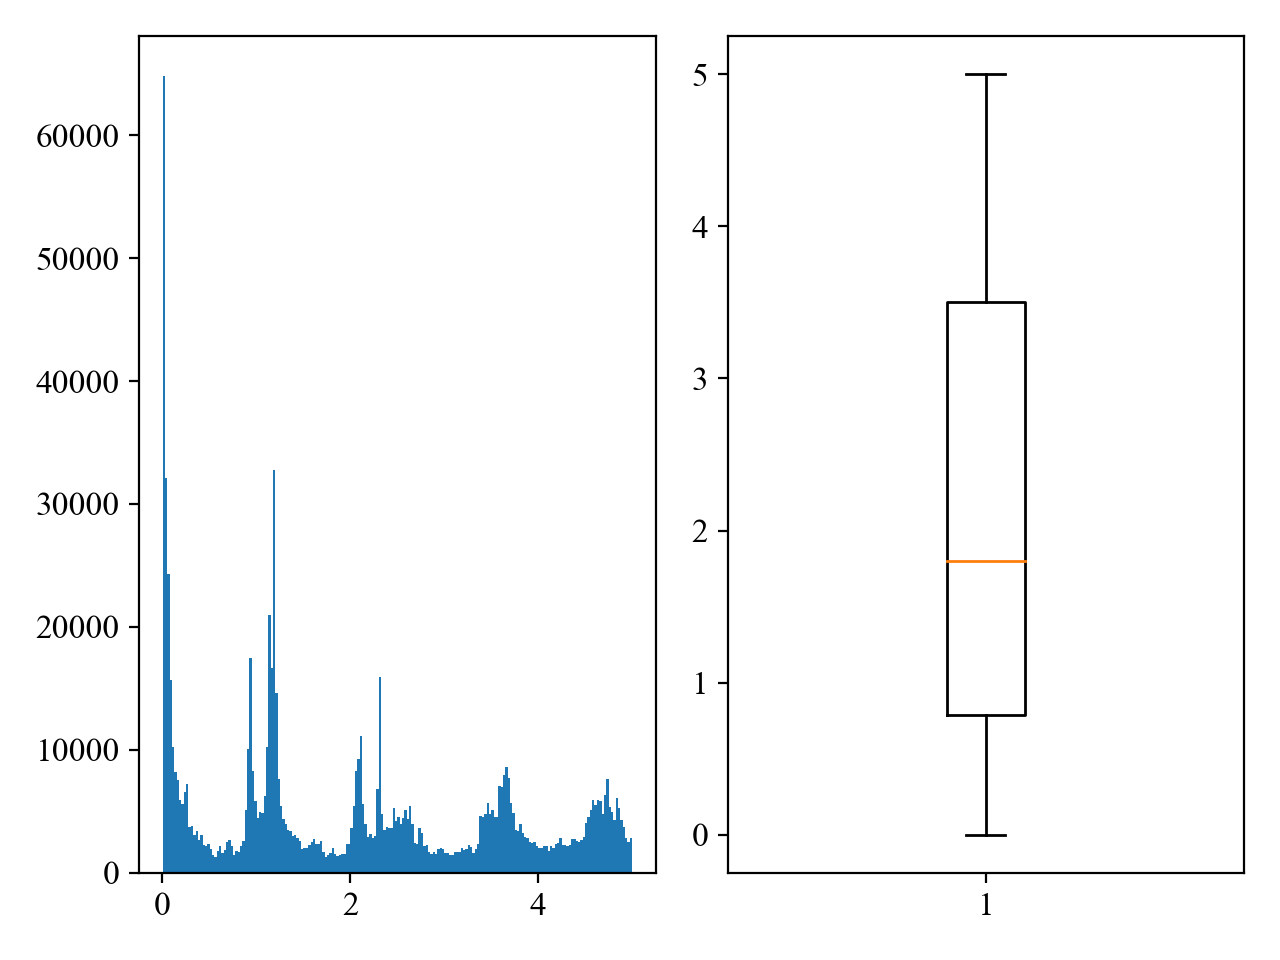

[3.998180495230049, 4.179840122319048]


<IPython.core.display.Javascript object>


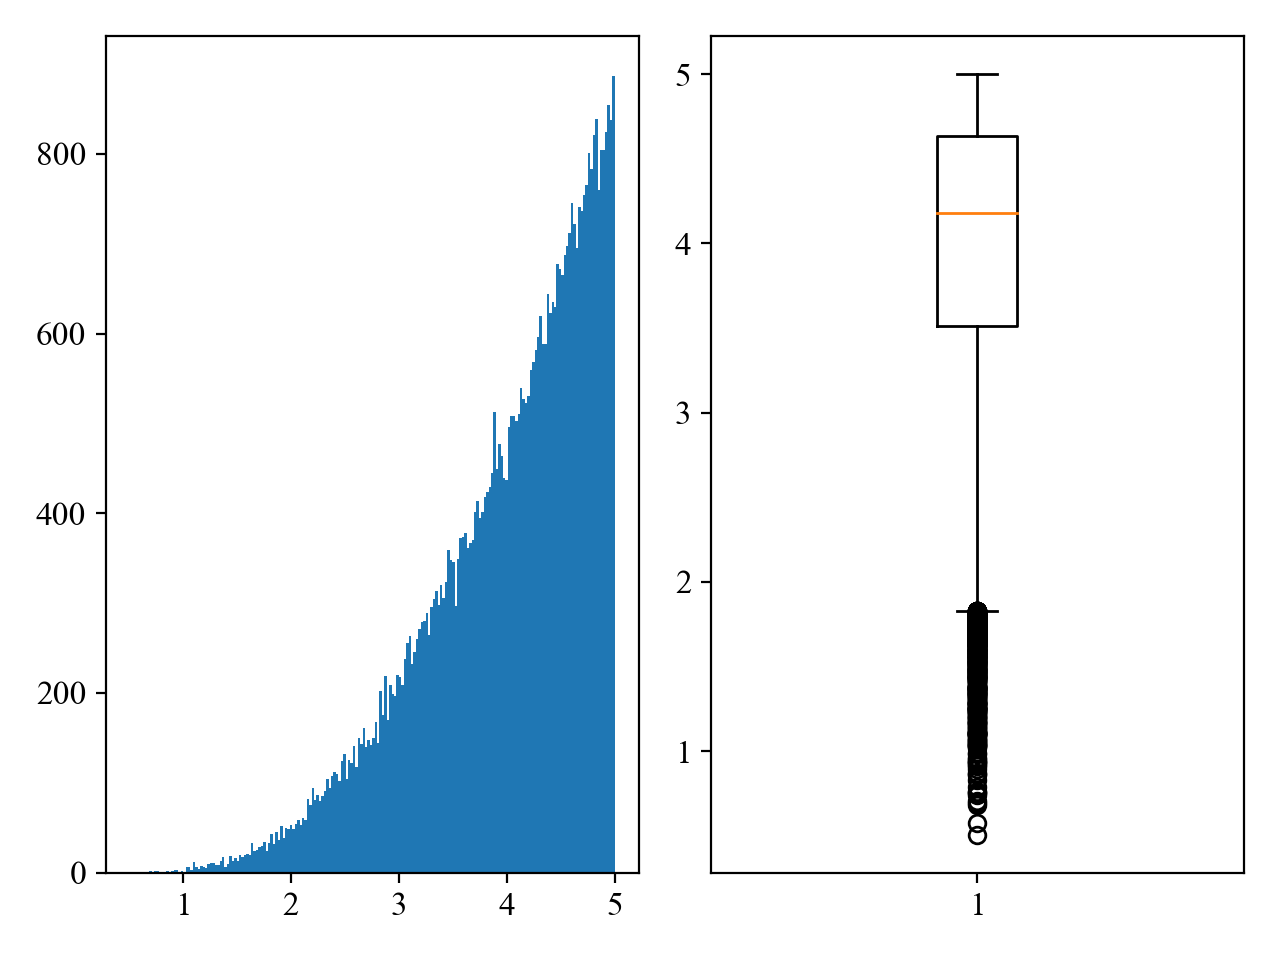

In [23]:
# print(Indexes_Random.shape)
# print(Indexes_Random[1])
# print(Indexes_Random[1,1])
# i=1
# print(RMSE_matrix_Random[Indexes_Random[:,0],Indexes_Random[:,1]].shape)
Error=RMSE_matrix_Random[Indexes_Random[:,0],Indexes_Random[:,1]].flatten()
print([np.mean(Error),np.median(Error)])
plt.figure()
plt.subplot(1,2,1)
plt.hist(Error, bins = 200)
# plt.ylim(top=100)
plt.tight_layout()

plt.subplot(1,2,2)
plt.boxplot(Error)
plt.tight_layout()

Error=RMSE_matrix_3min_TempExcl[Indexes_3min_TempExcl[:,0],Indexes_3min_TempExcl[:,1]].flatten()
print([np.mean(Error),np.median(Error)])

plt.figure()
plt.subplot(1,2,1)

plt.hist(Error, bins = 200)
# plt.ylim(top=100)
plt.tight_layout()
plt.subplot(1,2,2)
plt.boxplot(Error)
plt.tight_layout()

